# Day9 Practice Assignments:
 
    1.Build an Autoencoders deep neural network model for solving any specific problems. The task and dataset you  may decide for which build a model.

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Step 2: Load and Preprocess Data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Introduce random noise to create a noisy dataset
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [9]:
# Step 3: Build Autoencoder Model
input_img = Input(shape=(28, 28, 1))

In [10]:
# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [11]:
autoencoder = Model(input_img, decoded)

# Visualize model architecture
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 64)          3692

In [12]:
# Step 4: Training
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train_noisy, x_train, epochs=5, batch_size=16, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/5
3750/3750 [==============================] - 153s 40ms/step - loss: 0.1101 - val_loss: 0.0984
Epoch 2/5
3750/3750 [==============================] - 150s 40ms/step - loss: 0.0972 - val_loss: 0.0957
Epoch 3/5
3750/3750 [==============================] - 151s 40ms/step - loss: 0.0953 - val_loss: 0.0939
Epoch 4/5
3750/3750 [==============================] - 151s 40ms/step - loss: 0.0944 - val_loss: 0.0940
Epoch 5/5
3750/3750 [==============================] - 147s 39ms/step - loss: 0.0939 - val_loss: 0.0940


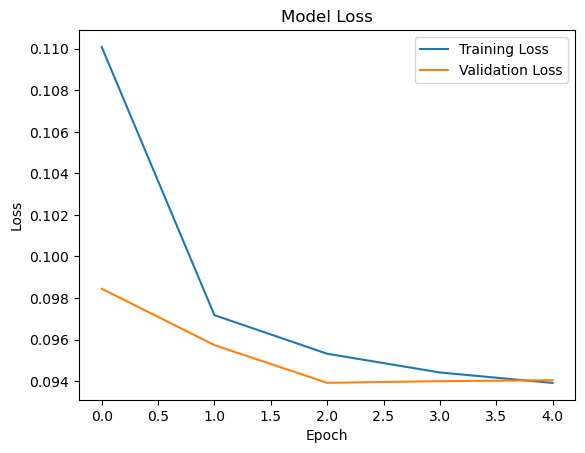

In [13]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

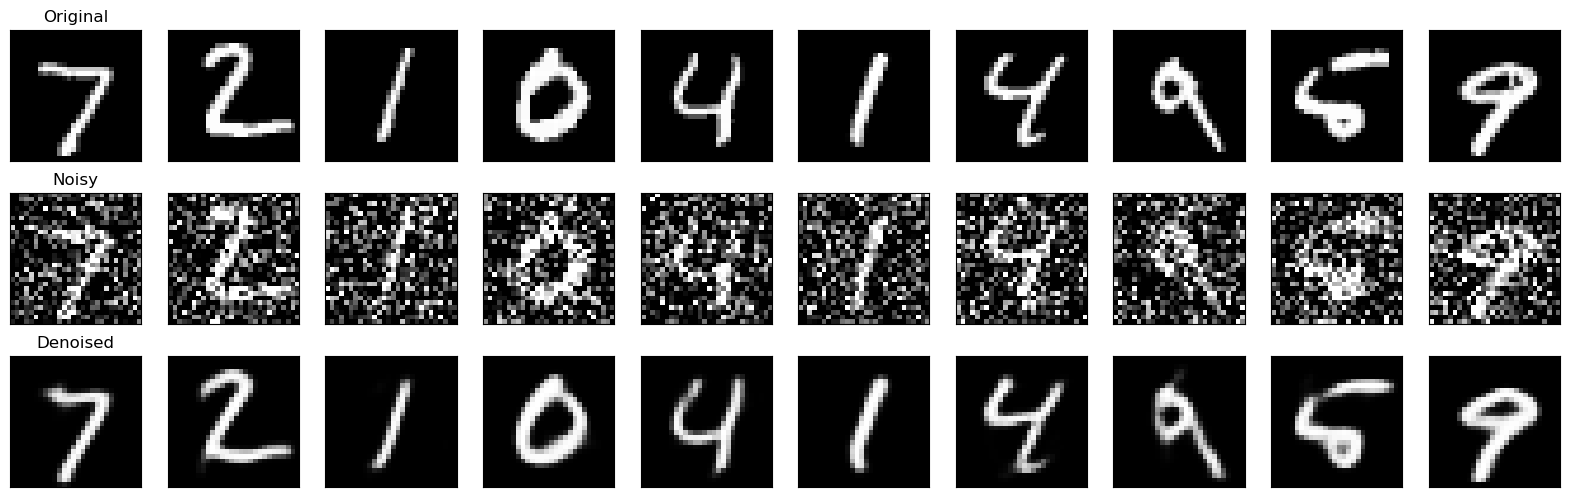

In [15]:
# Visualize some examples before and after denoising
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Original')

    # Display noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Noisy')

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Denoised')

plt.show()

1/1 [==============================] - 0s 23ms/step


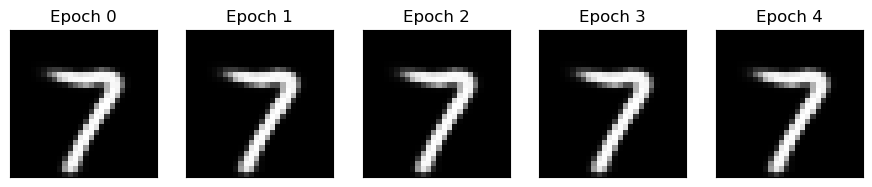

In [19]:
# Visualize denoising process for a single image over multiple epochs
index_to_visualize = 0
epochs_to_visualize = [0, 1, 2, 3, 4]

plt.figure(figsize=(11, 3))
for epoch in epochs_to_visualize:
    denoised_img = autoencoder.predict(x_test_noisy[index_to_visualize].reshape(1, 28, 28, 1))

    ax = plt.subplot(1, len(epochs_to_visualize), epochs_to_visualize.index(epoch) + 1)
    plt.imshow(denoised_img.squeeze(), cmap='gray')
    plt.title(f'Epoch {epoch}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()